## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.


In this homework, we will use the Bank Marketing dataset. Download it from [here](https://archive.ics.uci.edu/static/public/222/bank+marketing.zip).

You can do it with `wget`:

```bash
wget https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
unzip bank+marketing.zip 
unzip bank.zip
```

We need `bank-full.csv`.

In this dataset the target variable is `y` variable - has the client subscribed a term deposit or not. 

### Dataset preparation

For the rest of the homework, you'll need to use only these columns:

* `'age'`,
* `'job'`,
* `'marital'`,
* `'education'`,
* `'balance'`,
* `'housing'`,
* `'contact'`,
* `'day'`,
* `'month'`,
* `'duration'`,
* `'campaign'`,
* `'pdays'`,
* `'previous'`,
* `'poutcome'`,
* `'y'`



Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`




In [267]:
# import important files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression


In [268]:
# load dataset
df = pd.read_csv("C:/Users/Priyanka/Downloads/bank+marketing/bank/bank-full.csv",sep = ';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [269]:
# select required features
columns = ['age',
'job',
'marital',
'education',
'balance',
'housing',
'contact',
'day',
'month',
'duration',
'campaign',
'pdays',
'previous',
'poutcome',
'y']

In [270]:
df_sub = df[columns]
df_sub.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


In [271]:
df_sub.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [272]:
# check for missing values
df_sub.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [273]:
df_in = df_sub.copy()

In [274]:
df_in

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,no


In [275]:
# apply lambda function to perform target encoding
df_in['y'] = df_in['y'].apply(lambda x : 1 if x == 'yes' else 0)
df_in

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,825,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,1729,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,5715,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,668,no,telephone,17,nov,508,4,-1,0,unknown,0


In [276]:
# split the dataset int train/val/test into 60%/20%/20% ratio.
from sklearn.model_selection import train_test_split,KFold
df_train_full, df_test = train_test_split(df_in, test_size= 0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size = 0.25, random_state =  1)


In [277]:
df_full_train = df_train_full.reset_index(drop = True)
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [278]:
y_full_train = df_full_train.y.values
y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

In [279]:
del df_full_train['y']
del df_train['y']
del df_val['y']
del df_test['y'] 

In [280]:
len(df_train),len(df_val), len(df_test)

(27126, 9042, 9043)

### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score (aka prediction) and compute the AUC with the `y` variable as ground truth.
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['engine_hp']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `balance`
- `day`
- `duration`
- `previous`



In [282]:
# select numerical columns
numerical_columns = df_train.select_dtypes(include='number').columns.to_list()
numerical_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [283]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix
for i in numerical_columns:
    auc = roc_auc_score(y_train,df_train[i])
    # If your AUC is < 0.5, invert this variable by putting "-" in front
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[i])
    print(f'auc for {i} = {auc:5f}')



auc for age = 0.512186
auc for balance = 0.588831
auc for day = 0.525958
auc for duration = 0.814700
auc for campaign = 0.571454
auc for pdays = 0.590128
auc for previous = 0.598565


***Answer***= duration

### Question 2: Training the model

Apply one-hot-encoding using `DictVectorizer` and train the logistic regression with these parameters:

```python
LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
```

What's the AUC of this model on the validation dataset? (round to 3 digits)

- 0.69
- 0.79
- 0.89
- 0.99




In [285]:
categorical_columns = df_train.select_dtypes(include = 'object').columns.to_list()
categorical_columns

['job', 'marital', 'education', 'housing', 'contact', 'month', 'poutcome']

In [286]:
# Train a logistic regression model.
columns = numerical_columns + categorical_columns

dv = DictVectorizer(sparse=False)
train_dicts = df_train[columns].to_dict(orient='records')
val_dicts = df_val[columns].to_dict(orient='records')

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000,random_state=1)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:, 1]
the_score = roc_auc_score(y_val, y_pred)

print(round(the_score, 2))

0.9


***Answer*** =0.89

### Question 3: Precision and Recall

Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.265
* 0.465
* 0.665
* 0.865


In [288]:
thresholds = np.linspace(0, 1, 100, endpoint=False)
type(thresholds)

numpy.ndarray

In [289]:
def compute_precision_recall(
    y_true: np.ndarray, y_pred: np.ndarray, thresholds: np.ndarray
) -> pd.DataFrame:
    """Computes precision and recall (along with tp,fp,tn,fn) based on
    the true labels, the predicted probabilities and an array of
    thresholds.

    Args:
        y_true (np.ndarray): The true labels (must be either 0 or 1)
        y_pred (np.ndarray): The predicted probabilities (must be in [0,1])
        thresholds (np.ndarray): The array of thresholds (must be in [0,1))

    Returns:
        pd.DataFrame: The dataframe with results
    """
    scores = []
    for t in thresholds:
        actual_positive = y_true == 1
        actual_negative = y_true == 0

        predict_positive = y_pred >= t
        predict_negative = y_pred < t

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    df_scores = pd.DataFrame(scores, columns=["t", "TP", "FP", "FN", "TN"])
    recall = df_scores.TP / (df_scores.TP + df_scores.FN)
    precision = df_scores.TP / (df_scores.TP + df_scores.FP)
    df_scores["precision"] = precision
    df_scores["recall"] = recall
    return df_scores

In [290]:
df_pr = compute_precision_recall(y_val, y_pred, thresholds)

In [291]:
df_pr

,t,TP,FP,FN,TN,precision,recall
0,0.00,1098,7944,0,0,0.121433,1.000000
1,0.01,1094,6969,4,975,0.135682,0.996357
2,0.02,1093,5770,5,2174,0.159260,0.995446
3,0.03,1087,4721,11,3223,0.187156,0.989982
4,0.04,1066,3790,32,4154,0.219522,0.970856
...,...,...,...,...,...,...,...
95,0.95,39,19,1059,7925,0.672414,0.035519
96,0.96,31,17,1067,7927,0.645833,0.028233
97,0.97,26,15,1072,7929,0.634146,0.023679
98,0.98,20,10,1078,7934,0.666667,0.018215


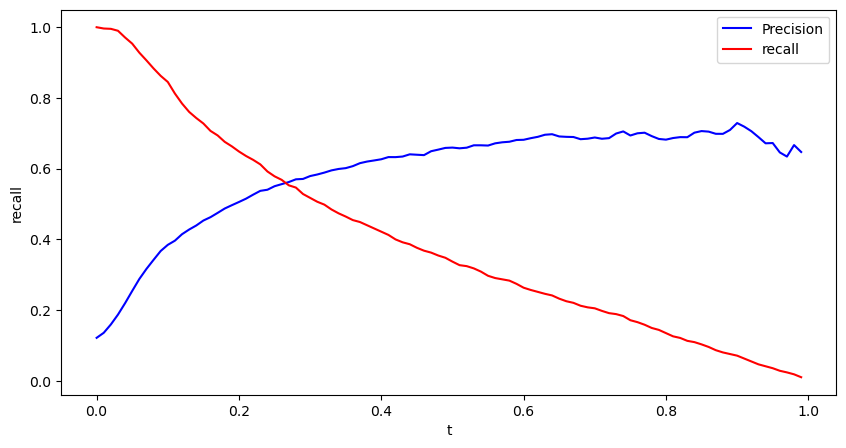

In [292]:
# Plot Precision vs t
plt.figure(figsize=(10, 5))
plt.plot(df_pr['t'], df_pr['precision'], label='Precision', color='blue')
plt.xlabel('t')
plt.ylabel('Precision')
plt.legend()
plt.plot(df_pr['t'], df_pr['recall'], label='recall', color='red')
plt.xlabel('t')
plt.ylabel('recall')

plt.legend()

plt.show()

***Answer***=0.265

### Question 4: F1 score

Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

$$F_1 = 2 \cdot \cfrac{P \cdot R}{P + R}$$

Where $P$ is precision and $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

- 0.02
- 0.22
- 0.42
- 0.62




In [294]:
def cal_f1_score(p, r):
    return 2 * p * r / (p + r)

In [295]:
f1_scores = cal_f1_score(df_pr.precision.values,df_pr.recall.values)

In [296]:
f1_scores

array([0.21656805, 0.23883855, 0.27458862, 0.31479873, 0.3580786 ,
       0.40122629, 0.43941354, 0.46900778, 0.49313676, 0.51495378,
       0.5284738 , 0.53269633, 0.5423622 , 0.54754098, 0.55209743,
       0.55854596, 0.55927928, 0.56381798, 0.56619611, 0.56786271,
       0.56823623, 0.56909906, 0.57142857, 0.57215837, 0.56497175,
       0.56394316, 0.56216216, 0.5573921 , 0.55788006, 0.5487228 ,
       0.54641655, 0.54217455, 0.53971386, 0.53413655, 0.52899288,
       0.52415211, 0.51979167, 0.51922064, 0.51465104, 0.5094238 ,
       0.50408274, 0.49944873, 0.48995536, 0.48423423, 0.48181818,
       0.47362385, 0.46678221, 0.46522501, 0.45953928, 0.45530393,
       0.44605184, 0.43673966, 0.43467643, 0.43033292, 0.42190417,
       0.41057935, 0.40559441, 0.40255591, 0.39922978, 0.39090909,
       0.37976347, 0.37375746, 0.36849132, 0.36339166, 0.35859269,
       0.34764826, 0.33928571, 0.33402346, 0.323836  , 0.31865828,
       0.31578947, 0.30671378, 0.2991453 , 0.29698709, 0.29067

In [297]:
f1_max_thr = df_pr.t.iloc[f1_scores.argmax()]
f1_max_thr

0.23

***Answer***= 0.22

### Question 5: 5-Fold CV


Use the `KFold` class from Scikit-Learn to evaluate our model on 5 different folds:

```
KFold(n_splits=5, shuffle=True, random_state=1)
```

* Iterate over different folds of `df_full_train`
* Split the data into train and validation
* Train the model on train with these parameters: `LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`
* Use AUC to evaluate the model on validation

How large is standard deviation of the scores across different folds?

- 0.0001
- 0.006
- 0.06
- 0.26




In [299]:
def train(df_train, y_train):
    dicts = df_train.to_dict(orient='records')
 
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
 
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train, y_train)
 
    return dv, model

In [300]:
def predict(df, dv, model):
     dicts = df.to_dict(orient='records')
 
     X = dv.transform(dicts)
     y_pred = model.predict_proba(X)[:,1]
 
     return y_pred

In [345]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=1) 
 
scores = []
 
for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
 
    y_train = y_full_train[train_idx]
    y_val = y_full_train[val_idx]
 
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
 
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)
 

In [353]:
scores = np.array(scores)

***Answer*** = 0.006

### Question 6: Hyperparameter Tuning

Now let's use 5-Fold cross-validation to find the best parameter `C`

* Iterate over the following `C` values: `[0.000001, 0.001, 1]`
* Initialize `KFold` with the same parameters as previously
* Use these parameters for the model: `LogisticRegression(solver='liblinear', C=C, max_iter=1000)`
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which `C` leads to the best mean score?

- 0.000001
- 0.001
- 1

If you have ties, select the score with the lowest std. If you still have ties, select the smallest `C`.



## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2024/homework/hw04
* If your answer doesn't match options exactly, select the closest one